# SAL 384 NCAA Div 1 Men's Basketball Win Model

In [12]:
#allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
lahman.download_lahman()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
ncaa_2010_2020 = pd.read_csv("data/ncaa2010_2020.csv")
ncaa_2010_2020['opponentWinPercentage'] = ncaa_2010_2020.WinOverall_opponent / (ncaa_2010_2020.WinOverall_opponent + 
                                                                                ncaa_2010_2020.LossOverall_opponent)
ncaa_2010_2020['winPercentage'] = ncaa_2010_2020.WinOverall / (ncaa_2010_2020.WinOverall + ncaa_2010_2020.LossOverall)

win_prediction_fixed_formula = "Win ~ winPercentage + opponentWinPercentage + C(location)"
win_prediction_fixed_logit_model = smf.logit(formula = str(win_prediction_fixed_formula), data = ncaa_2010_2020).fit()
win_prediction_fixed_logit_model.summary()

#schedule_stats[["Win","location","WinOverall",'LossOverall','WinOverall_opponent','LossOverall_opponent','Date','Season','Team','Opponent','gameNum','opponentGameNum']].to_csv("../data/ncaa2010_2020.csv", index=False)
win_prediction_fixed_logit_model.get_margeff().summary()


Optimization terminated successfully.
         Current function value: 0.570091
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Win   No. Observations:                38456
Model:                          Logit   Df Residuals:                    38451
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Apr 2020   Pseudo R-squ.:                  0.1775
Time:                        10:25:56   Log-Likelihood:                -21923.
converged:                       True   LL-Null:                       -26656.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.6146      0.045    -13.609      0.000      -0.703      -0.526
C(location)[T.H]          1.2256      0.024     51.186      0.000       1.179       1.273
C(location)[T.N]          0.6132      0.061     10.015      0.000       0.493       0.733
winPercentage             3.9733      0.066     59.952      0.000       3.843       4.103
opponentWinPercentage    -3.9712      0.066    -59.927      0.000      -4.101      -3.841
=========================================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                    Win
Method:                          dydx
At:                           overall
=========================================================================================
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
C(location)[T.H]          0.2379      0.004     58.789      0.000       0.230       0.246
C(location)[T.N]          0.1190      0.012     10.061      0.000       0.096       0.142
winPercentage             0.7714      0.011     72.920      0.000       0.751       0.792
opponentWinPercentage    -0.7709      0.011    -72.874      0.000      -0.792      -0.750
=========================================================================================
"""

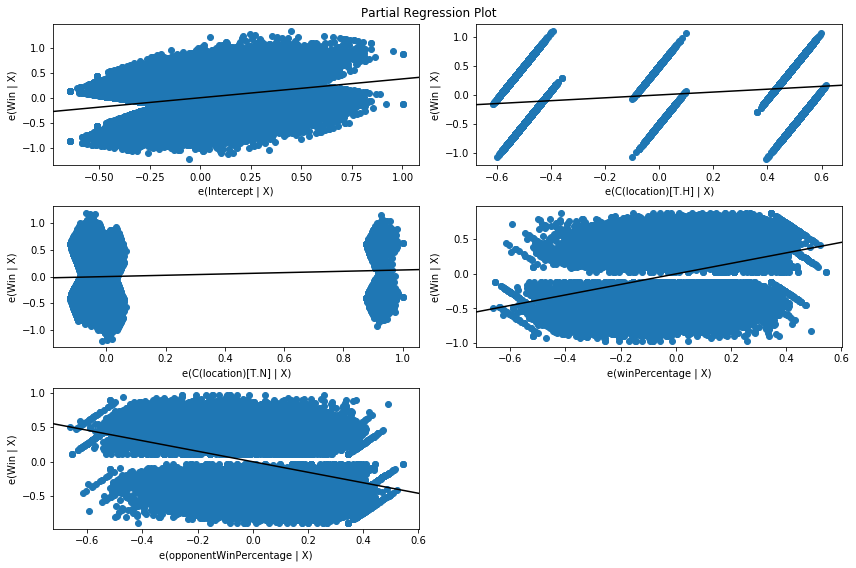

In [14]:
#partial regression plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(win_prediction_fixed_logit_model, fig=fig)